# Elemento `Truss`

El elemento `Truss` plano es un elemento finito con coordenadas locales y globales, tiene un modulo de elasticidad $E$, una sección transversal $A$ y una longitud $L$. Cada elemento tiene dos nodos y un ángulo de inclinación $\theta$ medido en sentido antihorario desde el eje $X$ global, como se muestra en la figura. Sean $C=\cos(\theta)$ y $S=\sin(\theta)$, entonces la matriz de rigidez por elemento está dada por:

$$
k = \frac{EA}{L}
\begin{bmatrix}
C^2 & CS & -C^2 & -CS \\
CS & S^2 & -CS & -S^2 \\
-C^2 & -CS & C^2 & CS \\
-CS & -S^2 & CS & S^2 \\
\end{bmatrix}
$$

<img src="src/truss-element/truss_element.PNG" width="200px">

El elemento `Truss` tiene dos grados de libertad en cada nodo: desplazamientos en `X` e `Y`. 

La fuerza en cada elemento se calcula como sigue:

$$
f = \frac{EA}{L} \begin{bmatrix} -C & -S & C & S \end{bmatrix} \left\{ u \right\}
$$

Donde $f$ es la fuerza (escalar) en el elemento y $\left\{u\right\}$ el vector de desplazamientos en el elemento. Una fuerza negativa indica que el elemento está sometido a compresión.

El esfuerzo en el elemento se obtiene dividiendo la fuerza $f$ por la sección transversal, es decir:

$$
\sigma = \frac{f}{A}
$$

## Ejemplo 1. Estructura simple de tres elementos

Como primer ejemplo vamos a resolver una estructura simple de tres elementos, con un apoyo fijo en A, un soporte simple en C y una fuerza horizontal de 500 N en B, como se muestra en la figura.

<figure>
<img src="src/truss-element/example_01.png" width="250px">
<center><figcaption>Fuente: [1]</figcaption></center>
</figure>

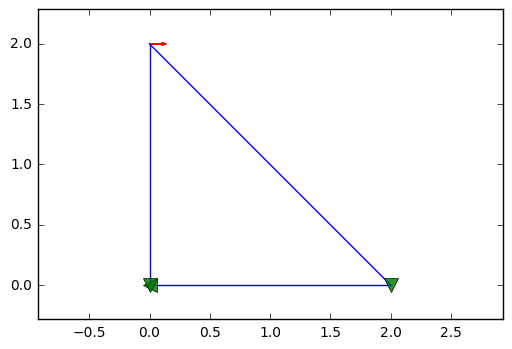

In [1]:
%matplotlib inline
from nusa import * # Importando nusa

E,A = 210e9, 3.1416*(10e-3)**2
n1 = Node((0,0))
n2 = Node((2,0))
n3 = Node((0,2))
e1 = Truss((n1,n2),E,A)
e2 = Truss((n1,n3),E,A)
e3 = Truss((n2,n3),E,A)
m = TrussModel()
for n in (n1,n2,n3): m.addNode(n)
for e in (e1,e2,e3): m.addElement(e)
m.addConstraint(n1, ux=0, uy=0)
m.addConstraint(n2, uy=0)
m.addForce(n3, (5000,0))
m.plot_model()
m.solve()

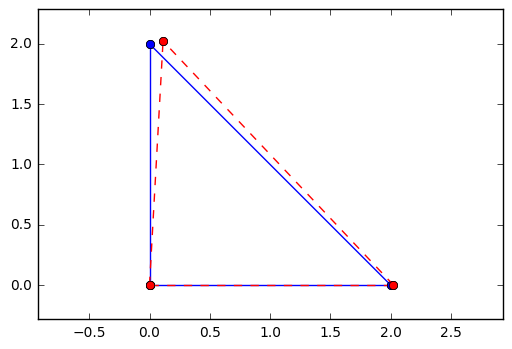

In [2]:
m.plot_deformed_shape()

In [3]:
m.simple_report()


    NuSA Simple Report

Model: Truss Model 01
Number of nodes: 3
Number of elements: 3

NODAL DISPLACEMENTS
======  ===========  ===========
  Node           UX           UY
======  ===========  ===========
     1            0            0
     2  0.000151576            0
     3  0.000731873  0.000151576
======  ===========  ===========

NODAL FORCES
======  ===========  ===========
  Node           FX           FY
======  ===========  ===========
     1        -5000        -5000
     2  2.27374e-13         5000
     3         5000  9.09495e-13
======  ===========  ===========

ELEMENT FORCES
=========  ========
  Element         F
=========  ========
        1      5000
        2      5000
        3  -7071.07
=========  ========

ELEMENT STRESSES
=========  ============
  Element             S
=========  ============
        1   1.59155e+07
        2   1.59155e+07
        3  -2.25079e+07
=========  ============


FINITE-ELEMENT MODEL INFO

NODES:
======  ===  ===
  Node    X    Y
===

---

## Ejemplo 2.


<img src="src/truss-element/example_02.png" width="300px">

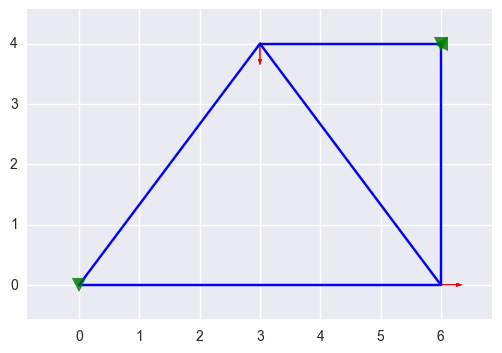

In [5]:
E,A = 200e9, 0.01
n1 = Node((0,0))
n2 = Node((6,0))
n3 = Node((6,4))
n4 = Node((3,4))
e1 = Truss((n1,n2),E,A)
e2 = Truss((n2,n3),E,A)
e3 = Truss((n4,n3),E,A)
e4 = Truss((n1,n4),E,A)
e5 = Truss((n2,n4),E,A)
m = TrussModel()
for n in (n1,n2,n3,n4): m.addNode(n)
for e in (e1,e2,e3,e4,e5): m.addElement(e)
m.addConstraint(n1, uy=0)
m.addConstraint(n3, ux=0, uy=0)
m.addForce(n2, (600,0))
m.addForce(n4, (0,-400))
m.plot_model()
m.solve()

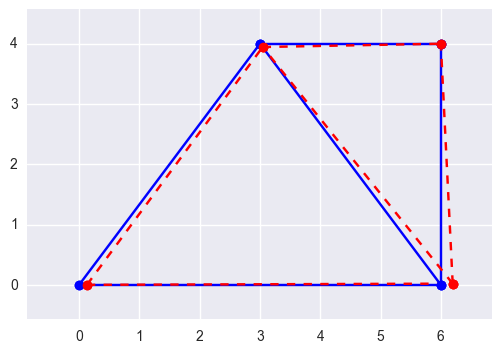

In [6]:
m.plot_deformed_shape()

In [7]:
m.simple_report()


    NuSA Simple Report

Model: Truss Model 01
Number of nodes: 4
Number of elements: 5

NODAL DISPLACEMENTS
======  =========  ===========
  Node         UX           UY
======  =========  ===========
     1  2.575e-06            0
     2  3.925e-06        4e-07
     3          0            0
     4      9e-07  -1.0875e-06
======  =========  ===========

NODAL FORCES
======  ============  ===========
  Node            FX           FY
======  ============  ===========
     1  -2.84217e-14          600
     2           600  1.13687e-13
     3          -600         -200
     4   1.56319e-13         -400
======  ============  ===========

ELEMENT FORCES
=========  ====
  Element     F
=========  ====
        1   450
        2  -200
        3  -600
        4  -750
        5   250
=========  ====

ELEMENT STRESSES
=========  ======
  Element       S
=========  ======
        1   45000
        2  -20000
        3  -60000
        4  -75000
        5   25000
=========  ======


FINITE-ELEMENT 

## Ejemplo 3

<figure>
<img src="src/truss-element/example_03.png" width="350px">
<center><figcaption>Fuente: [2]</figcaption></center>
</figure>

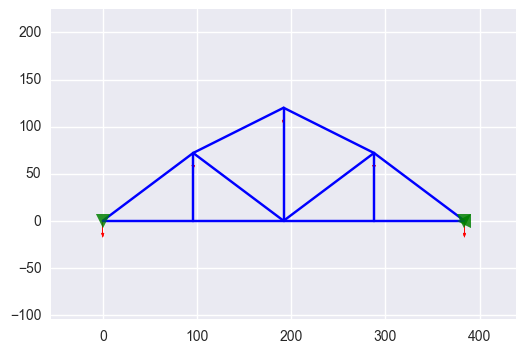

In [8]:
E,A = 29e6, 0.1
n1 = Node((0,0)) # A
n2 = Node((8*12,6*12)) # B
n3 = Node((8*12,0)) # C
n4 = Node((16*12,10*12)) # D
n5 = Node((16*12,0)) # E
n6 = Node((24*12,6*12)) # F
n7 = Node((24*12,0)) # G
n8 = Node((32*12,0)) # H

e1 = Truss((n1,n2),E,A)
e2 = Truss((n1,n3),E,A)
e3 = Truss((n2,n3),E,A)
e4 = Truss((n2,n4),E,A)
e5 = Truss((n2,n5),E,A)
e6 = Truss((n3,n5),E,A)
e7 = Truss((n4,n5),E,A)
e8 = Truss((n4,n6),E,A)
e9 = Truss((n5,n6),E,A)
e10 = Truss((n5,n7),E,A)
e11 = Truss((n6,n7),E,A)
e12 = Truss((n6,n8),E,A)
e13 = Truss((n7,n8),E,A)

m = TrussModel("Gambrel Roof")
for n in (n1,n2,n3,n4,n5,n6,n7,n8): m.addNode(n)
for e in (e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12,e13): m.addElement(e)

m.addConstraint(n1, uy=0)
m.addConstraint(n8, ux=0, uy=0)
m.addForce(n2, (0,-600))
m.addForce(n4, (0,-600))
m.addForce(n6, (0,-600))
m.addForce(n8, (0,-600))
m.addForce(n1, (0,-600))
m.plot_model()
m.solve()

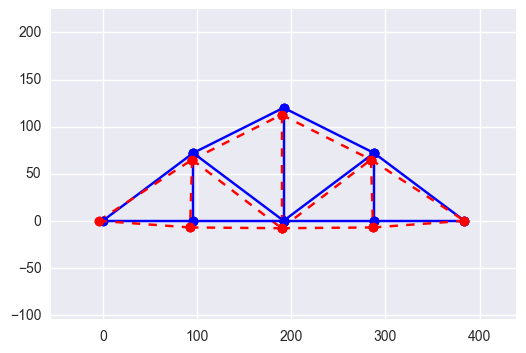

In [9]:
m.plot_deformed_shape()

In [9]:
m.simple_report()


    NuSA Simple Report

Model: Gambrel Roof
Number of nodes: 8
Number of elements: 13

NODAL DISPLACEMENTS
======  ==========  =========
  Node          UX         UY
======  ==========  =========
     1   -0.158897          0
     2  -0.0421247  -0.259144
     3   -0.119172  -0.259144
     4  -0.0794483  -0.273323
     5  -0.0794483  -0.288219
     6   -0.116772  -0.259144
     7  -0.0397241  -0.259144
     8           0          0
======  ==========  =========

NODAL FORCES
======  ============  ============
  Node            FX            FY
======  ============  ============
     1             0           900
     2   4.54747e-13          -600
     3   4.54747e-13  -1.90023e-13
     4  -9.09495e-13          -600
     5   6.82121e-13             0
     6   4.54747e-13          -600
     7   4.54747e-13   1.90023e-13
     8             0           900
======  ============  ============

ELEMENT FORCES
=========  ========
  Element         F
=========  ========
        1     -1500
  

## Referencias

* [1] Hibbeler, R.C. (2010). *Engineering Mechanics, Statics*. Pearson
* [2] Beer, F.P. et. al. (2013) *Vector Mechanics for Engineers, Statics and Dynamics*. McGraw-Hill